In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# loading the file into a dataframe
df = pd.read_csv('data_cleaned_no_outliers.csv', index_col=0)
df.head()

,age,workclass,education,edu_years,marital_status,occupation,race,hours_per_week,native_country,income_code,sex_code
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,40,US,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,13,US,0,0
2,38,Private,HS-grad,9,Divorced/Widowed,Handlers-cleaners,White,40,US,0,0
3,53,Private,9th-11th,7,Married-civ-spouse,Handlers-cleaners,Black,40,US,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,40,Central_AM,0,1


In [3]:
df.shape

(29310, 11)

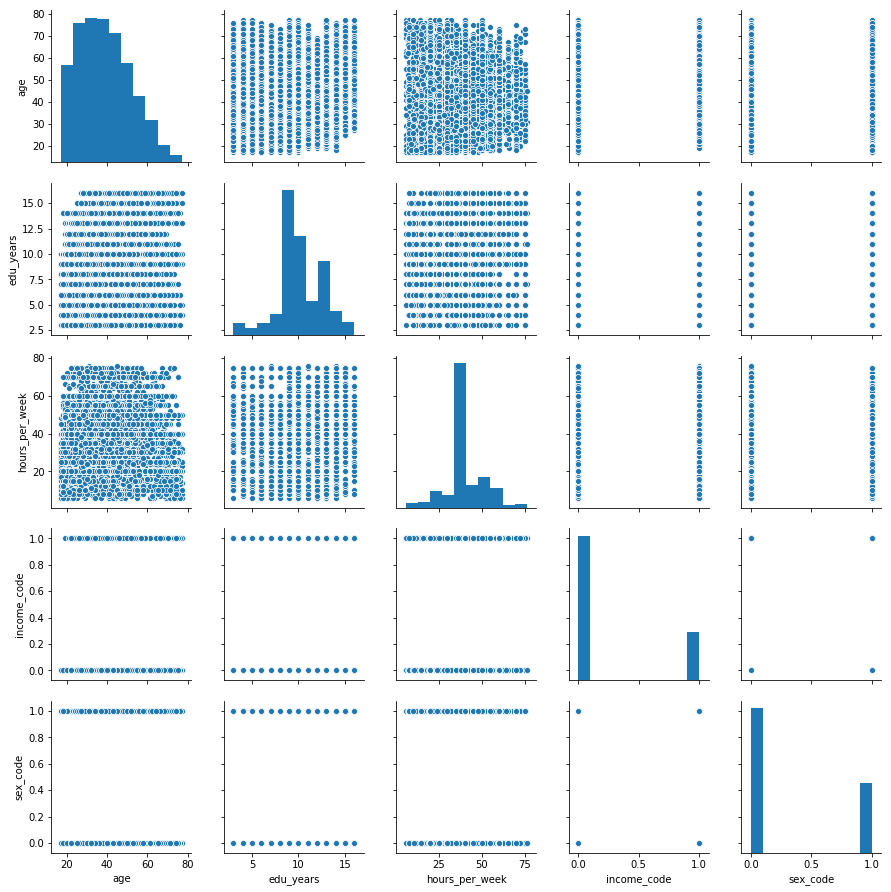

In [4]:
# pairplot
sns.pairplot(df);

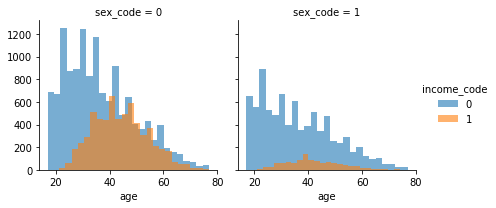

In [37]:
# distribution by sex and age
g = sns.FacetGrid(df, col='sex_code', hue='income_code')
g.map(plt.hist, 'age', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend();
plt.savefig('sex_age.pdf')

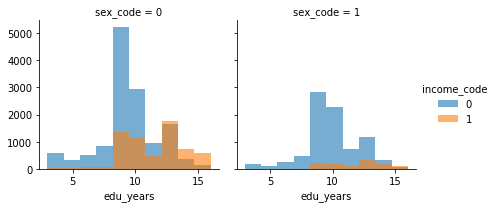

In [50]:
# distribution by sex and edu_years
g = sns.FacetGrid(df, col='sex_code', hue='income_code')
g.map(plt.hist, 'edu_years', alpha=0.6, bins=10) #alpha is for opacity
g.add_legend();
plt.savefig('sex_edu.pdf')

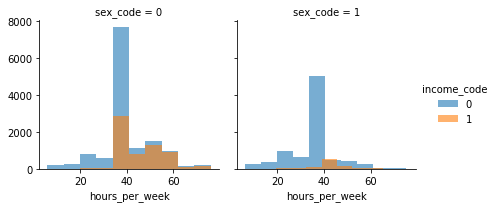

In [7]:
# distribution by sex and hours_per_week
g = sns.FacetGrid(df, col='sex_code', hue='income_code')
g.map(plt.hist, 'hours_per_week', alpha=0.6, bins=10) #alpha is for opacity
g.add_legend();

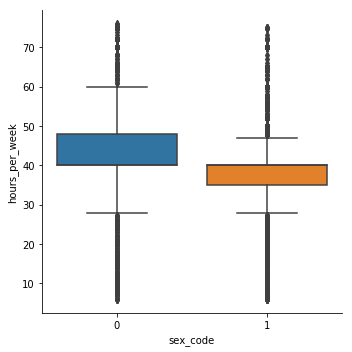

In [8]:
# distribution of working hours between genders
sns.catplot(x="sex_code", y="hours_per_week", kind="box", data=df);

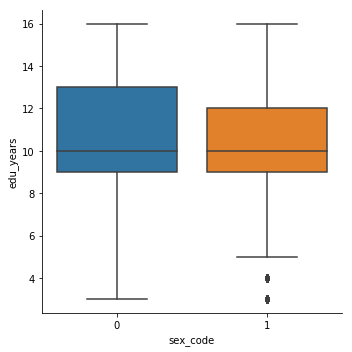

In [9]:
# distribution of years of education between genders
sns.catplot(x="sex_code", y="edu_years", kind="box", data=df);

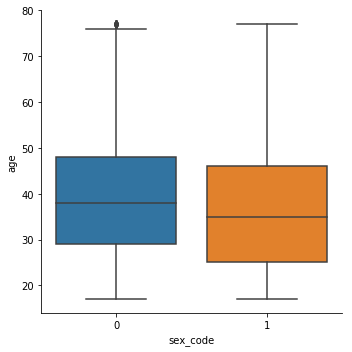

In [10]:
# distribution of age between genders
sns.catplot(x="sex_code", y="age", kind="box", data=df);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


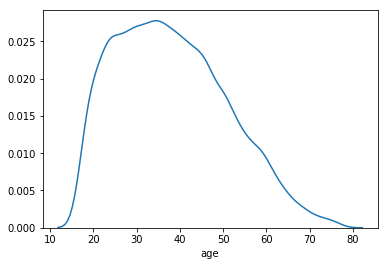

In [11]:
# distribution of age
sns.distplot(df['age'],hist=False, bins=10);

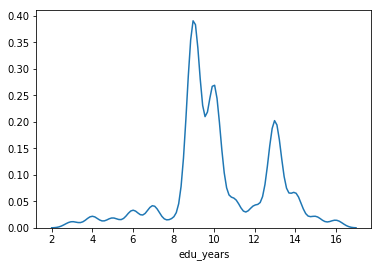

In [12]:
# distribution of years of education
sns.distplot(df['edu_years'],hist=False, bins=50);

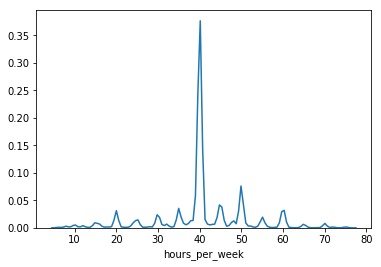

In [13]:
# distribution of working hours 
sns.distplot(df['hours_per_week'],hist=False, bins=10200);

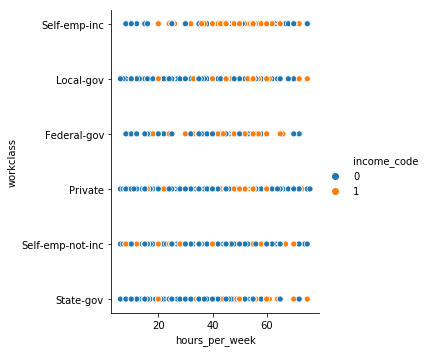

In [14]:
# distribution of working hours vs working hours
sns.relplot(x="hours_per_week", y="workclass", hue="income_code", data=df);

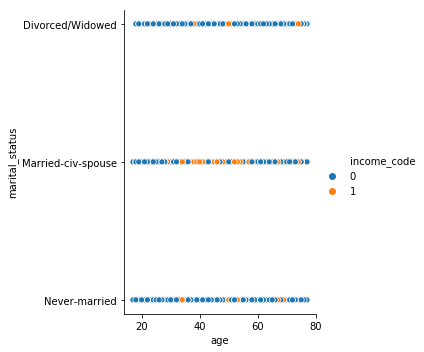

In [15]:
# distribution of age and for each marital status group
sns.relplot(x="age", y="marital_status", hue="income_code", data=df);

In [16]:
# Numeric summary for continuous variables
df.describe().transpose()

# age: looks fine
# edu_years: looks fine
# hours-per-week: looks fine (but need to check value '1')

,count,mean,std,min,25%,50%,75%,max
age,29310.0,38.188536,12.801969,17.0,28.0,37.0,47.0,77.0
edu_years,29310.0,10.173013,2.459121,3.0,9.0,10.0,13.0,16.0
hours_per_week,29310.0,40.607097,10.712604,6.0,40.0,40.0,45.0,76.0
income_code,29310.0,0.249949,0.432991,0.0,0.0,0.0,0.0,1.0
sex_code,29310.0,0.325793,0.468678,0.0,0.0,0.0,1.0,1.0


In [17]:
# correlation table
round(df.corr(), 2)
# nothing to seee here

,age,edu_years,hours_per_week,income_code,sex_code
age,1.00,0.06,0.13,0.26,-0.08
edu_years,0.06,1.00,0.17,0.34,-0.01
hours_per_week,0.13,0.17,1.00,0.24,-0.24
income_code,0.26,0.34,0.24,1.00,-0.22
sex_code,-0.08,-0.01,-0.24,-0.22,1.00


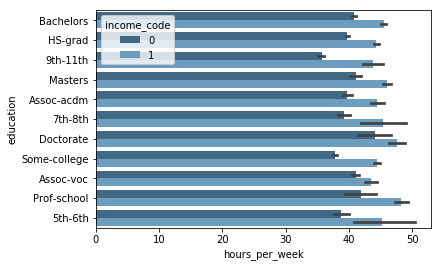

In [18]:
# distribution of working hours for each education group and income groups 
sns.barplot(y="education", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

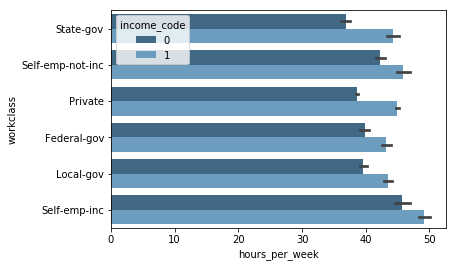

In [19]:
# distribution of working hours for each workclass group and income groups 
sns.barplot(y="workclass", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

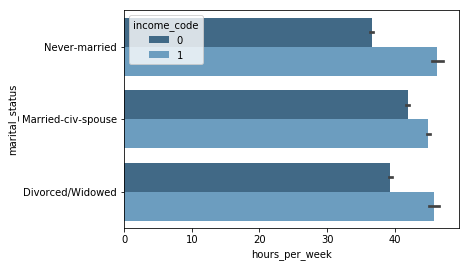

In [20]:
# distribution of working hours for each marital status and income groups 
sns.barplot(y="marital_status", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

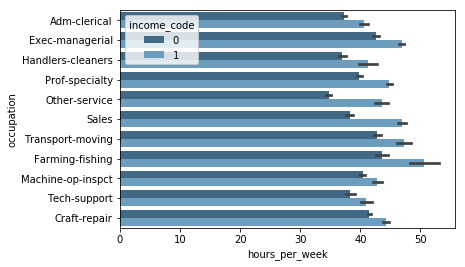

In [21]:
# distribution of working hours for each occupation and income groups 
sns.barplot(y="occupation", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

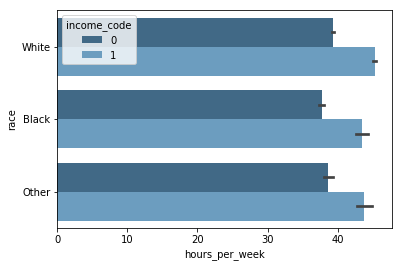

In [22]:
# distribution of working hours for race and income group
sns.barplot(y="race", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

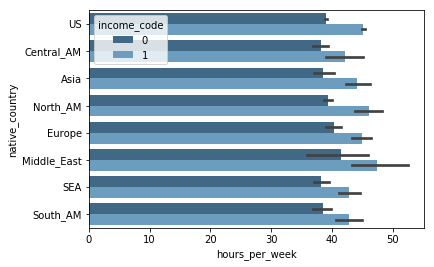

In [23]:
# distribution of working hours for each region and income group
sns.barplot(y="native_country", x="hours_per_week", hue="income_code", data=df, palette="Blues_d"); 

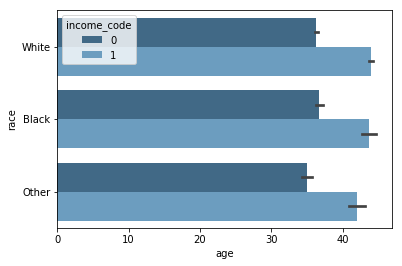

In [24]:
# distribution of working hours for race and income group
sns.barplot(y="race", x="age", hue="income_code", data=df, palette="Blues_d"); 

In [44]:
#importing packages for dynamic visualisations 
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

#init_notebook_mode(connected=True)

In [46]:
df["age"].iplot(kind="histogram", bins=20, theme="white", title="Ages",xTitle='Ages', yTitle='Count')

In [47]:
df["edu_years"].iplot(kind="histogram", bins=20, theme="white", title="Years of education",xTitle='Years of education', yTitle='Count')

In [48]:
df["hours_per_week"].iplot(kind="histogram", bins=20, theme="white", title="Hours",xTitle='Hours', yTitle='Count')

In [29]:
above = df[df['income_code']==1]['workclass'].value_counts()
below = df[df['income_code']==0]['workclass'].value_counts()
df1 = pd.DataFrame([above, below])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Workclass by income')

In [30]:
above2 = df[df['income_code']==1]['education'].value_counts()
below2 = df[df['income_code']==0]['education'].value_counts()
df1 = pd.DataFrame([above2, below2])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Education by income')

In [49]:
above3 = df[df['income_code']==1]['marital_status'].value_counts()
below3 = df[df['income_code']==0]['marital_status'].value_counts()
df1 = pd.DataFrame([above3, below3])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Marital status by income')



In [32]:
above4 = df[df['income_code']==1]['occupation'].value_counts()
below4 = df[df['income_code']==0]['occupation'].value_counts()
df1 = pd.DataFrame([above4, below4])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Occupation by income')

In [33]:
above5 = df[df['income_code']==1]['race'].value_counts()
below5 = df[df['income_code']==0]['race'].value_counts()
df1 = pd.DataFrame([above5, below5])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Race by income')

In [34]:
above6 = df[df['income_code']==1]['native_country'].value_counts()
below6 = df[df['income_code']==0]['native_country'].value_counts()
df1 = pd.DataFrame([above6, below6])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Origin by income')

In [35]:
above7 = df[df['income_code']==1]['sex_code'].value_counts()
below7 = df[df['income_code']==0]['sex_code'].value_counts()
df1 = pd.DataFrame([above7, below7])
df1.index = ['> 50K', '<= 50K']
df1.iplot(kind='bar',barmode='stack', title='Gender by income')